# Definitions

In [19]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.optimize

In [33]:
a=.2
b=.1

In [34]:
def mod(x):
    return a*x**2-b*x

def fit(x,a,b):
    return a*x**2+b*x

## Simulate data

In [35]:
datx=np.arange(10)
daty=mod(np.arange(10))+np.random.normal(0,2,10)

<ErrorbarContainer object of 3 artists>

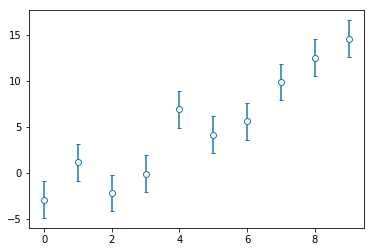

In [36]:
pl.errorbar(datx,daty,yerr=2,fmt='o',mfc='w',capsize=2)

### Run the fit

In [37]:
pval,pcov=scipy.optimize.curve_fit(fit,datx,daty,[0,0],sigma=[2]*10,absolute_sigma=True)

In [38]:
pval

array([ 0.1923277 , -0.03686274])

In [39]:
np.sqrt(np.diag(pcov))

array([0.06506542, 0.47724502])

In [71]:
def modjac(x):
    return np.array([x**2,x]).T

In [72]:
jac1=modjac(np.linspace(0,10))

err=np.diag(np.sqrt(np.dot(np.dot(jac1,(pcov)),jac1.T)))

/gpfs/fs1/home/djukanov/venv/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


<ErrorbarContainer object of 3 artists>

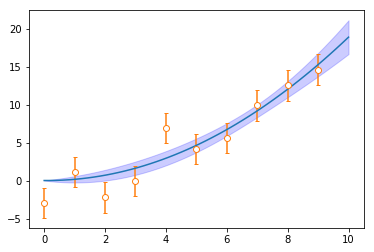

In [73]:
fvals=fit(np.linspace(0,10),*pval)
pl.plot(np.linspace(0,10),fvals)
pl.fill_between(np.linspace(0,10),fvals+err,fvals-err,color='b',alpha=.2)
pl.errorbar(datx,daty,yerr=2,fmt='o',mfc='w',capsize=2)